In [12]:
#https://analyticsindiamag.com/pyflux-guide-python-library-for-time-series-analysis-and-prediction/
#!pip install PyFlux

     |████████████████████████████████| 1.3MB 2.9MB/s 
     |████████████████████████████████| 962kB 16.2MB/s 
  Created wheel for PyFlux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656631 sha256=6d959a8669dfe961ffc99eb35eaedec242b852ec191de824b1a778af539d8ba4
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built PyFlux


In [24]:
!pip install pandas_datareader


In [44]:
#Importing required libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pyflux as pf
import datetime

In [45]:
#Downloading the data 
start_date = '2010-01-01'
end_date = '2016-12-31'
msft = data.DataReader('MSFT', 'yahoo', start_date, end_date)

In [46]:
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.168472
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.176279
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.027906
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.778025
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.942017


In [47]:
#Calculating the Stock Returns 

# Finding the returns
returns = pd.DataFrame(np.diff(np.log(msft['Adj Close'].values)))

#Setting date column as index
returns.index = msft.index.values[1:msft.index.values.shape[0]]

returns.columns = ["Returns"]

returns.head()

,Returns
2010-01-05,0.000323
2010-01-06,-0.006156
2010-01-07,-0.010454
2010-01-08,0.006873
2010-01-11,-0.012802


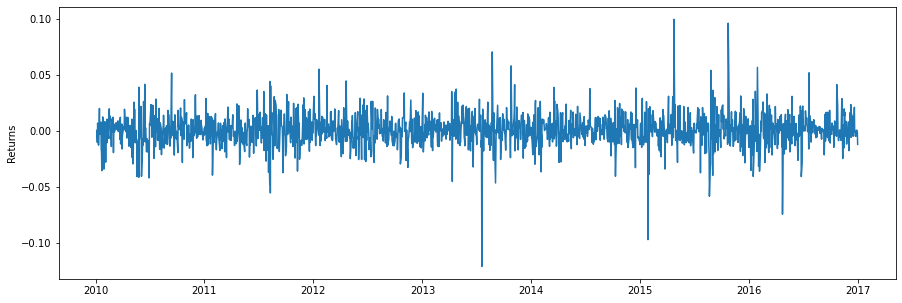

In [48]:
#Visualizing the Data
plt.figure(figsize=(15, 5))
plt.ylabel("Returns")
plt.plot(returns)
plt.show()


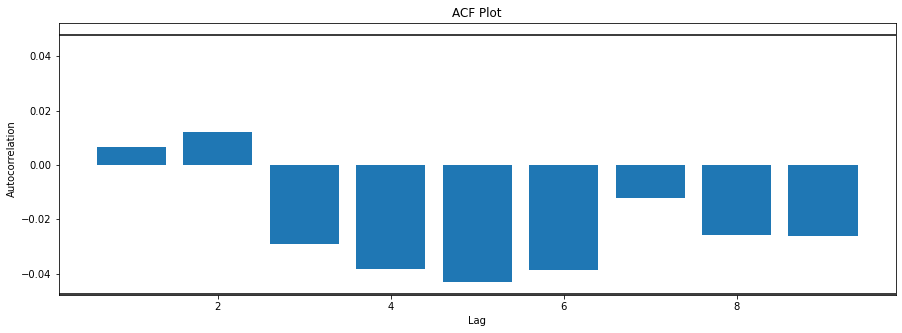

In [50]:
pf.acf_plot(returns.values.T[0])

In [51]:
#Return analysis using different Models

#Generalized Autoregressive Conditional Heteroskedasticity (GARCH) is a model that is used to analyze different types of financial data
gar_model = pf.GARCH(p=1, q=1, data=returns)
gar = gar_model.fit()
gar.summary()


gar_model.plot_fit(figsize=(15,5))
gar_model.plot_predict(h=20, figsize=(15,5))


AttributeError: ignored

In [52]:
#ARIMA stands for AutoRegressive Integrated Moving Average
arm_model = pf.ARIMA(data=returns, ar=4, ma=4, target='Returns',  family = pf.Normal())

In [54]:
arm = arm_model.fit("MLE")

In [55]:
arm.summary()

Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: Returns                             Method: MLE                                       
Start Date: 2010-01-11 00:00:00                         Log Likelihood: 4938.3871                         
End Date: 2016-12-30 00:00:00                           AIC: -9856.7742                                   
Number of observations: 1757                            BIC: -9802.0606                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0002     0.0002     1.2044   0.2284   (-0.0001 | 0.0006)       
AR(1)                                

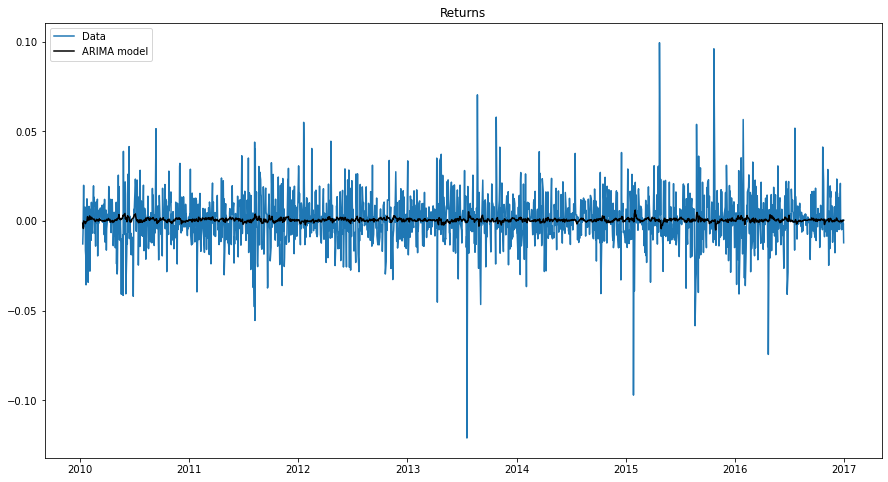

In [56]:
arm_model.plot_fit(figsize=(15,8))

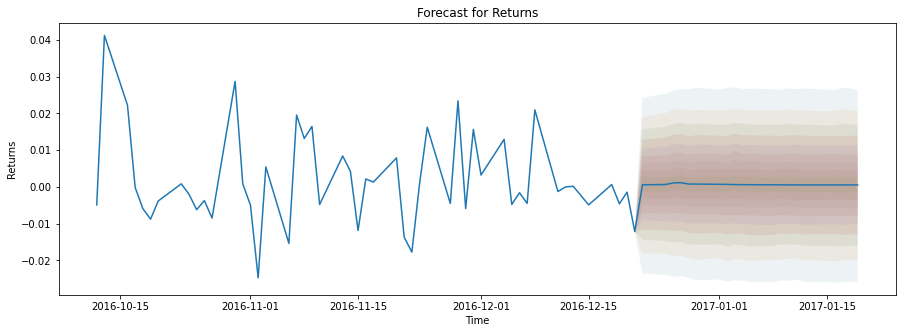

In [57]:
arm_model.plot_predict(h=20,past_values=50,figsize=(15,5))